# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è YOLO3 Î™®Îç∏ Í∞ÄÏ†∏Ïò§Í∏∞
* OpenCVÎ°ú YOLO3 Î™®Îç∏ Î°úÎìú

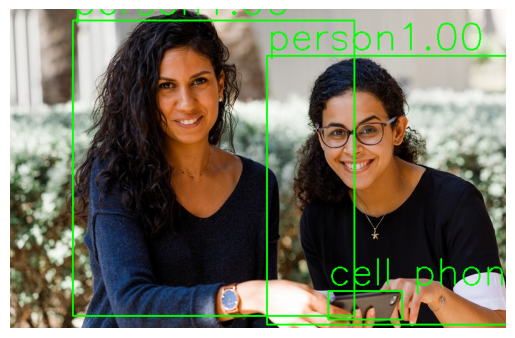

In [ ]:
import gradio as gr                          # Gradio: Ïõπ UI ÏÉùÏÑ±ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ (ÌòÑÏû¨ ÏÇ¨Ïö© ÏïàÌï®)
import cv2                                   # OpenCV: Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Î∞è Îî•Îü¨Îãù Î™®Îç∏ Ï∂îÎ°†Ïö©
import numpy as np                           # NumPy: ÏàòÏπò Ïó∞ÏÇ∞ Î∞è Î∞∞Ïó¥ Ï≤òÎ¶¨
import matplotlib.pyplot as plt              # Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨

# YOLOv3 Î™®Îç∏ ÌååÏùº Í≤ΩÎ°ú ÏßÄÏ†ï
weights_path = "../Azure AI Vision/YOLO3/yolov3.weights"    # ÌïôÏäµÎêú Í∞ÄÏ§ëÏπò / Ïö©ÎüâÏù¥Ïª§ÏÑú ÍπÉÌóàÎ∏åÏóê Î™ªÏò¨Î¶º ÏõêÎìúÎùºÏù¥Î∏åÏóê Î≥¥Í¥Ä
config_path = "../Azure AI Vision/YOLO3/yolov3.cfg"          # ÎÑ§Ìä∏ÏõåÌÅ¨ Íµ¨ÏÑ± ÌååÏùº
names_path = "../Azure AI Vision/YOLO3/coco.names"           # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ ÌååÏùº = Ïñ¥Îñ§Í±∞Î•º ÌïôÏäµÌñàÎäîÏßÄ

# YOLOv3 Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
net = cv2.dnn.readNet(weights_path, config_path)            # Î™®Îç∏Í≥º ÏÑ§Ï†ï ÌååÏùºÏùÑ Ïù¥Ïö©Ìï¥ ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÉùÏÑ±

# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Î∂àÎü¨Ïò§Í∏∞ (Ïòà: person, car, dog Îì±)
with open(names_path, 'r') as f:
    labels = f.read().strip().split('\n')                   # Í∞Å ÎùºÏù∏ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•

# Í∞ùÏ≤¥ Í∞êÏßÄ Ìï®Ïàò Ï†ïÏùò
def detect_objects_YOLO3(image_path):

    # Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ (BGR ÌòïÏãù)
    image = cv2.imread(image_path)
    height, width = image.shape[:2]                         # Ïù¥ÎØ∏ÏßÄ ÎÜíÏù¥ÏôÄ ÎÑàÎπÑ

    # ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÎ•º ÎÑ§Ìä∏ÏõåÌÅ¨ ÏûÖÎ†•(blob) ÌòïÌÉúÎ°ú Î≥ÄÌôò
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416),
                                 swapRB=True, crop=False)   # Ï†ïÍ∑úÌôî + ÌÅ¨Í∏∞Î≥ÄÌôò + ÏÉâÏÉÅÎ≥ÄÌôò
    net.setInput(blob)                                      # ÎÑ§Ìä∏ÏõåÌÅ¨ ÏûÖÎ†•ÏúºÎ°ú ÏÑ§Ï†ï

    layer_names = net.getLayerNames()                       # Ï†ÑÏ≤¥ Î†àÏù¥Ïñ¥ Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Í∏∞
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
                                                            # Ï∂úÎ†• Î†àÏù¥Ïñ¥(ÏòàÏ∏°Í∞íÏù¥ ÎÇòÏò§Îäî Í≥≥) Ï∂îÏ∂ú

    detections = net.forward(output_layers)                 # Î™®Îç∏ Ï∂îÎ°† ÏàòÌñâ ‚Üí Ïó¨Îü¨ Î†àÏù¥Ïñ¥ Ï∂úÎ†• Î∞òÌôò

    boxes = []          # Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú Ï†ÄÏû• Î¶¨Ïä§Ìä∏
    confidences = []    # Ïã†Î¢∞ÎèÑ Ï†ÄÏû• Î¶¨Ïä§Ìä∏
    class_ids = []      # Í∞êÏßÄÎêú Í∞ùÏ≤¥ ÌÅ¥ÎûòÏä§ ID Ï†ÄÏû• Î¶¨Ïä§Ìä∏

    # Í∞Å Ï∂úÎ†• Î†àÏù¥Ïñ¥Ïóê ÎåÄÌï¥
    for output in detections:
        for detection in output:
            scores = detection[5:]                          # Ïïû 5Í∞úÎäî Î∞ïÏä§ Ï¢åÌëú + Í∞ùÏ≤¥ ÌôïÎ•†, Ïù¥ÌõÑÎäî ÌÅ¥ÎûòÏä§ ÌôïÎ•†
            class_id = np.argmax(scores)                    # Í∞ÄÏû• ÌôïÎ•† ÎÜíÏùÄ ÌÅ¥ÎûòÏä§ ÏÑ†ÌÉù
            confidence = scores[class_id]                   # Ìï¥Îãπ ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†

            if confidence > 0.5:                            # Í∞êÏßÄ Í∏∞Ï§Ä: 0.5 Ïù¥ÏÉÅÎßå ÌïÑÌÑ∞ÎßÅ
                box = detection[:4] * np.array([width, height, width, height])  # ÏõêÎûò ÌÅ¨Í∏∞Î°ú ÌôòÏÇ∞
                (center_x, center_y, w, h) = box.astype("int")                  # Ï§ëÏã¨Ï¢åÌëú, ÎÑàÎπÑ, ÎÜíÏù¥
                x = int(center_x - (w / 2))                                     # ÏôºÏ™Ω ÏÉÅÎã® xÏ¢åÌëú
                y = int(center_y - (h / 2))                                     # ÏôºÏ™Ω ÏÉÅÎã® yÏ¢åÌëú

                boxes.append([x, y, int(w), int(h)])        # Î∞ïÏä§ Ï¢åÌëú Ï†ÄÏû•
                confidences.append(float(confidence))       # Ïã†Î¢∞ÎèÑ Ï†ÄÏû•
                class_ids.append(class_id)                  # ÌÅ¥ÎûòÏä§ ID Ï†ÄÏû•

    # ÎπÑÏµúÎåÄ ÏñµÏ†ú(NMS) Ï†ÅÏö© ‚Üí Ï§ëÎ≥µ Î∞ïÏä§ Ï†úÍ±∞
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    """
    YOLO Í∞ôÏùÄ Î™®Îç∏ÏùÄ ÌïòÎÇòÏùò Í∞ùÏ≤¥(Ïòà: ÏÇ¨Îûå 1Î™Ö) Ïóê ÎåÄÌï¥
    Ïó¨Îü¨ Í∞úÏùò Î∞ïÏä§Î•º ÎèôÏãúÏóê ÏòàÏ∏°,
    Í∑∏ Ïù¥Ïú†Îäî:
	‚Ä¢	ÏÑúÎ°ú Îã§Î•∏ anchor box, scale, ÏúÑÏπò Í∏∞Î∞òÏúºÎ°ú ÏòàÏ∏°ÎêòÍ∏∞ ÎïåÎ¨∏.
	‚Ä¢	Í≤∞Í≥ºÏ†ÅÏúºÎ°ú ÎπÑÏä∑Ìïú ÏúÑÏπòÏóê Ïó¨Îü¨ Í∞úÏùò Î∞ïÏä§ÏÉùÏÑ±Ìï®

    üß† NMS (Non-Maximum Suppression, ÎπÑÏµúÎåÄ ÏñµÏ†ú) Ï§ëÎ≥µ Î∞ïÏä§ Ï†úÍ±∞ÎûÄ?
    Ïù¥Îü∞ Í≤πÏπòÎäî Î∞ïÏä§Îì§ Ï§ëÏóêÏÑú Í∞ÄÏû• Ïã†Î¢∞ÎèÑ ÎÜíÏùÄ Í≤É ÌïòÎÇòÎßå ÎÇ®Í∏∞Í≥† ÎÇòÎ®∏ÏßÄÎäî Î≤ÑÎ¶¨Îäî Í≤É
    """

    # Í∞êÏßÄÎêú Í∞ùÏ≤¥Í∞Ä ÏûàÏùÑ Í≤ΩÏö∞ ÏãúÍ∞ÅÌôî
    if len(indices) > 0:
        for i in indices.flatten():
            x, y, w, h = boxes[i]
            label = str(labels[class_ids[i]])               # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ
            confidence = confidences[i]                     # Ïã†Î¢∞ÎèÑ

            # Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏î Î∞è Ïã†Î¢∞ÎèÑ ÌëúÏãú
            cv2.putText(image, f"{label}{confidence:.2f}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)

            # OpenCVÎäî BGR ‚Üí ÏãúÍ∞ÅÌôîÏö© RGB Î≥ÄÌôò
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image  # Í∞êÏßÄ Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ Î∞òÌôò

# ÌÖåÏä§Ìä∏Ïö© Ïù¥ÎØ∏ÏßÄ Í∞êÏßÄ Ïã§Ìñâ
a = detect_objects_YOLO3("../Azure AI Vision/images/people.jpg")

# ÏãúÍ∞ÅÌôî
plt.axis("off")              # Ï¢åÌëúÏ∂ï Ïà®Í∏∞Í∏∞
plt.imshow(a)                # RGB Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
plt.show()                   # Í≤∞Í≥º Ï∂úÎ†•

# ultralytics ÌÜµÌï¥ÏÑú yolov8nÎ™®Îç∏ Îã§Ïö¥Î°úÎìúÌïòÍ∏∞
## ÌååÎùºÎØ∏ÌÑ∞ Í∏∞Î≥∏Í∞íÏúºÎ°ú ÏßÑÌñâ


0: 640x480 4 persons, 1 bus, 1 stop sign, 52.9ms
Speed: 2.1ms preprocess, 52.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


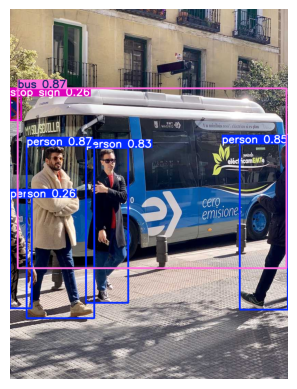

In [3]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
image = cv2.imread("../Azure AI Vision/YOLO3/images/bus.jpg")

results = model(image)

for result in results:
    result_image = result.plot()   # Î∞ïÏä§, ÌÅ¥ÎûòÏä§, ÏïåÏïÑÏÑú Í∑∏Î†§Ï§å
    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(result_image)
plt.show()

## ÌååÎùºÎØ∏ÌÑ∞ ÏàòÏ†ïÌï† Ïàò ÏûàÍ≤å ÏΩîÎìúÎ≥ÄÍ≤Ω

üìå `results = model(image)` ÏÑ§Î™Ö (Ultralytics YOLOv8)

Ïù¥ ÏΩîÎìúÎäî **YOLOv8 Í∞ùÏ≤¥ Í∞êÏßÄ Î™®Îç∏Ïóê Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•ÌïòÍ≥†**,  
**Ï∂îÎ°† Í≤∞Í≥ºÎ•º Î∞õÏïÑÏò§Îäî ÌïµÏã¨ Ï§Ñ**ÏûÖÎãàÎã§.

---

üîç 1. Î¨¥ÏóáÏùÑ ÌïòÎäîÍ∞Ä?

```python
results = model(image)
```

- `image`: `cv2.imread()` Îì±ÏúºÎ°ú Î∂àÎü¨Ïò® **ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ**
- `model`: `YOLO("yolov8n.pt")`Î°ú Î°úÎìúÎêú **YOLOv8 Î™®Îç∏**
- `results`: Î™®Îç∏Ïù¥ Í∞êÏßÄÌïú **Í∞ùÏ≤¥ Ï†ïÎ≥¥Í∞Ä Îã¥Í∏¥ Î¶¨Ïä§Ìä∏**

---

üß† ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú ÏùºÏñ¥ÎÇòÎäî Ïùº

1. Ïù¥ÎØ∏ÏßÄÎ•º **YOLO Î™®Îç∏Ïóê Ï†ÑÎã¨**
2. YOLOÍ∞Ä Í∞ùÏ≤¥ Í∞êÏßÄÎ•º ÏàòÌñâ (bounding box, class, confidence)
3. Í≤∞Í≥ºÍ∞Ä `results`ÎùºÎäî Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú Î∞òÌôòÎê®

---

üì¶ `results` ÏïàÏóêÎäî Î¨¥ÏóáÏù¥ ÏûàÎÇò?

| ÏÜçÏÑ± | ÏÑ§Î™Ö |
|------|------|
| `results[0]` | Ìïú Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú Í∞êÏßÄ Í≤∞Í≥º Í∞ùÏ≤¥ |
| `results[0].boxes` | Í∞êÏßÄÎêú Í∞ùÏ≤¥Îì§Ïùò Î∞îÏö¥Îî© Î∞ïÏä§ Ï†ïÎ≥¥ |
| `boxes.xyxy` | `(x1, y1, x2, y2)` Ï¢åÌëú |
| `boxes.conf` | Í∞Å Í∞ùÏ≤¥Ïùò Ïã†Î¢∞ÎèÑ (0~1 ÏÇ¨Ïù¥ Í∞í) |
| `boxes.cls` | ÌÅ¥ÎûòÏä§ ID (Ï†ïÏàò) |
| `model.names[class_id]` | ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ (Ïòà: `'car'`, `'bus'`, `'person'`) |
| `result.plot()` | Í∞êÏßÄ Í≤∞Í≥ºÎ•º Í∑∏Î¶∞ Ïù¥ÎØ∏ÏßÄ (NumPy Î∞∞Ïó¥ ÌòïÌÉú) |

---

üí° ÏòàÏãú ÌùêÎ¶Ñ

```python
results = model(image)

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0].item()
        cls = int(box.cls[0])
        label = model.names[cls]
```

---

‚úÖ ÏöîÏïΩ

| Ìï≠Î™© | ÏÑ§Î™Ö |
|------|------|
| ÏûÖÎ†• | Ïù¥ÎØ∏ÏßÄ (`image`) |
| Ï∂úÎ†• | Í∞ùÏ≤¥ Í∞êÏßÄ Í≤∞Í≥º Î¶¨Ïä§Ìä∏ (`results`) |
| ÌïµÏã¨ Í∏∞Îä• | YOLOv8ÏúºÎ°ú **Í∞ùÏ≤¥ Í∞êÏßÄ ÏàòÌñâ Î∞è Í≤∞Í≥º Î∞òÌôò** |


0: 640x480 4 persons, 1 bus, 1 stop sign, 62.5ms
Speed: 2.7ms preprocess, 62.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


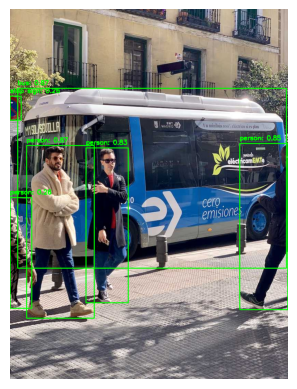

In [ ]:
from ultralytics import YOLO            # Ultralytics YOLOv8 Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
import cv2                               # OpenCV: Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ ÎùºÏù¥Î∏åÎü¨Î¶¨
import matplotlib.pyplot as plt          # Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú matplotlib

# YOLOv8n Î™®Îç∏ Î°úÎìú (n = nano, Í∞ÄÏû• ÏûëÏùÄ Î™®Îç∏)
model = YOLO("yolov8n.pt")               # ÌïôÏäµÎêú YOLOv8n Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¥(Îã§Ïö¥Î°úÎìú)

def detect_objects_YOLO3(image_path):
    # Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ (BGR ÌòïÏãùÏúºÎ°ú Î°úÎìúÎê®)
    image = cv2.imread(image_path)

    # Î™®Îç∏ÏùÑ ÌÜµÌï¥ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Í∞ùÏ≤¥ Í∞êÏßÄ ÏàòÌñâ
    results = model(image)                   # Í∞ùÏ≤¥ Í∞êÏßÄ ÏàòÌñâ ‚Üí Í≤∞Í≥º Î¶¨Ïä§Ìä∏ Î∞òÌôò

    # Í∞êÏßÄ Í≤∞Í≥º Ï≤òÎ¶¨
    for result in results:                   # Í≤∞Í≥ºÎäî Ïó¨Îü¨ Í∞úÏùº Ïàò ÏûàÏúºÎØÄÎ°ú Î∞òÎ≥µÎ¨∏ ÏÇ¨Ïö©
        for box in result.boxes:             # Í∞Å Í≤∞Í≥º ÎÇ¥Ïùò Í∞êÏßÄÎêú Í∞ùÏ≤¥(box)Îì§ ÏàúÌöå
            x1, y1, x2, y2 = map(int, box.xyxy[0])     # Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú (ÏôºÏ™Ω ÏúÑ, Ïò§Î•∏Ï™Ω ÏïÑÎûò)
            confidence = box.conf[0].item()            # Ìï¥Îãπ Í∞ùÏ≤¥Ïùò Ïã†Î¢∞ÎèÑ Ï∂îÏ∂ú
            class_id = int(box.cls[0])                 # Í∞ùÏ≤¥ ÌÅ¥ÎûòÏä§ ID (Ïòà: 0 = person)
            label = model.names[class_id]              # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ (Ïòà: "person", "car")

            # Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞ (ÎÖπÏÉâ)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Í∞ùÏ≤¥ ÎùºÎ≤® Î∞è Ïã†Î¢∞ÎèÑ Ï∂úÎ†•
            cv2.putText(image, f"{label}: {confidence:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # BGR Ïù¥ÎØ∏ÏßÄÎ•º RGBÎ°ú Î≥ÄÌôò (matplotlib Ï∂úÎ†•Ïö©)
    result_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return result_image

# Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
plt.axis("off")              # Ï∂ï Ï†úÍ±∞
plt.imshow(result_image)     # Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
plt.show()                   # Ï∞Ω ÎùÑÏö∞Í∏∞

# YOLO3 + YOLO8n + AzureAI Î™®Îç∏ Í∑∏ÎùºÎîîÏò§Î°ú Íµ¨ÌòÑÌïòÍ∏∞

In [16]:
import gradio as gr                          
import cv2                                   
import numpy as np
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential



weights_path = "../Azure AI Vision/YOLO3/yolov3.weights"    
config_path = "../Azure AI Vision/YOLO3/yolov3.cfg"          
names_path = "../Azure AI Vision/YOLO3/coco.names"           

# YOLOv3 Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
net = cv2.dnn.readNet(weights_path, config_path)            

# ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Î∂àÎü¨Ïò§Í∏∞ (Ïòà: person, car, dog Îì±)
with open(names_path, 'r') as f:
    labels = f.read().strip().split('\n')                   # Í∞Å ÎùºÏù∏ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•

# Í∞ùÏ≤¥ Í∞êÏßÄ Ìï®Ïàò Ï†ïÏùò
def detect_objects_YOLO3(image_path):

    # Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ (BGR ÌòïÏãù)
    image = cv2.imread(image_path)
    height, width = image.shape[:2]                         # Ïù¥ÎØ∏ÏßÄ ÎÜíÏù¥ÏôÄ ÎÑàÎπÑ

    # ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÎ•º ÎÑ§Ìä∏ÏõåÌÅ¨ ÏûÖÎ†•(blob) ÌòïÌÉúÎ°ú Î≥ÄÌôò
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416),
                                 swapRB=True, crop=False)   # Ï†ïÍ∑úÌôî + ÌÅ¨Í∏∞Î≥ÄÌôò + ÏÉâÏÉÅÎ≥ÄÌôò
    net.setInput(blob)                                      # ÎÑ§Ìä∏ÏõåÌÅ¨ ÏûÖÎ†•ÏúºÎ°ú ÏÑ§Ï†ï

    layer_names = net.getLayerNames()                       # Ï†ÑÏ≤¥ Î†àÏù¥Ïñ¥ Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Í∏∞
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
                                                            # Ï∂úÎ†• Î†àÏù¥Ïñ¥(ÏòàÏ∏°Í∞íÏù¥ ÎÇòÏò§Îäî Í≥≥) Ï∂îÏ∂ú

    detections = net.forward(output_layers)                 # Î™®Îç∏ Ï∂îÎ°† ÏàòÌñâ ‚Üí Ïó¨Îü¨ Î†àÏù¥Ïñ¥ Ï∂úÎ†• Î∞òÌôò

    boxes = []          # Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú Ï†ÄÏû• Î¶¨Ïä§Ìä∏
    confidences = []    # Ïã†Î¢∞ÎèÑ Ï†ÄÏû• Î¶¨Ïä§Ìä∏
    class_ids = []      # Í∞êÏßÄÎêú Í∞ùÏ≤¥ ÌÅ¥ÎûòÏä§ ID Ï†ÄÏû• Î¶¨Ïä§Ìä∏

    # Í∞Å Ï∂úÎ†• Î†àÏù¥Ïñ¥Ïóê ÎåÄÌï¥
    for output in detections:
        for detection in output:
            scores = detection[5:]                          # Ïïû 5Í∞úÎäî Î∞ïÏä§ Ï¢åÌëú + Í∞ùÏ≤¥ ÌôïÎ•†, Ïù¥ÌõÑÎäî ÌÅ¥ÎûòÏä§ ÌôïÎ•†
            class_id = np.argmax(scores)                    # Í∞ÄÏû• ÌôïÎ•† ÎÜíÏùÄ ÌÅ¥ÎûòÏä§ ÏÑ†ÌÉù
            confidence = scores[class_id]                   # Ìï¥Îãπ ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†

            if confidence > 0.5:                            # Í∞êÏßÄ Í∏∞Ï§Ä: 0.5 Ïù¥ÏÉÅÎßå ÌïÑÌÑ∞ÎßÅ
                box = detection[:4] * np.array([width, height, width, height])  # ÏõêÎûò ÌÅ¨Í∏∞Î°ú ÌôòÏÇ∞
                (center_x, center_y, w, h) = box.astype("int")                  # Ï§ëÏã¨Ï¢åÌëú, ÎÑàÎπÑ, ÎÜíÏù¥
                x = int(center_x - (w / 2))                                     # ÏôºÏ™Ω ÏÉÅÎã® xÏ¢åÌëú
                y = int(center_y - (h / 2))                                     # ÏôºÏ™Ω ÏÉÅÎã® yÏ¢åÌëú

                boxes.append([x, y, int(w), int(h)])        # Î∞ïÏä§ Ï¢åÌëú Ï†ÄÏû•
                confidences.append(float(confidence))       # Ïã†Î¢∞ÎèÑ Ï†ÄÏû•
                class_ids.append(class_id)                  # ÌÅ¥ÎûòÏä§ ID Ï†ÄÏû•

    # ÎπÑÏµúÎåÄ ÏñµÏ†ú(NMS) Ï†ÅÏö© ‚Üí Ï§ëÎ≥µ Î∞ïÏä§ Ï†úÍ±∞
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    """
    YOLO Í∞ôÏùÄ Î™®Îç∏ÏùÄ ÌïòÎÇòÏùò Í∞ùÏ≤¥(Ïòà: ÏÇ¨Îûå 1Î™Ö) Ïóê ÎåÄÌï¥
    Ïó¨Îü¨ Í∞úÏùò Î∞ïÏä§Î•º ÎèôÏãúÏóê ÏòàÏ∏°,
    Í∑∏ Ïù¥Ïú†Îäî:
	‚Ä¢	ÏÑúÎ°ú Îã§Î•∏ anchor box, scale, ÏúÑÏπò Í∏∞Î∞òÏúºÎ°ú ÏòàÏ∏°ÎêòÍ∏∞ ÎïåÎ¨∏.
	‚Ä¢	Í≤∞Í≥ºÏ†ÅÏúºÎ°ú ÎπÑÏä∑Ìïú ÏúÑÏπòÏóê Ïó¨Îü¨ Í∞úÏùò Î∞ïÏä§ÏÉùÏÑ±Ìï®

    üß† NMS (Non-Maximum Suppression, ÎπÑÏµúÎåÄ ÏñµÏ†ú) Ï§ëÎ≥µ Î∞ïÏä§ Ï†úÍ±∞ÎûÄ?
    Ïù¥Îü∞ Í≤πÏπòÎäî Î∞ïÏä§Îì§ Ï§ëÏóêÏÑú Í∞ÄÏû• Ïã†Î¢∞ÎèÑ ÎÜíÏùÄ Í≤É ÌïòÎÇòÎßå ÎÇ®Í∏∞Í≥† ÎÇòÎ®∏ÏßÄÎäî Î≤ÑÎ¶¨Îäî Í≤É
    """

    # Í∞êÏßÄÎêú Í∞ùÏ≤¥Í∞Ä ÏûàÏùÑ Í≤ΩÏö∞ ÏãúÍ∞ÅÌôî
    if len(indices) > 0:
        for i in indices.flatten():
            x, y, w, h = boxes[i]
            label = str(labels[class_ids[i]])               # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ
            confidence = confidences[i]                     # Ïã†Î¢∞ÎèÑ

            # Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏î Î∞è Ïã†Î¢∞ÎèÑ ÌëúÏãú
            cv2.putText(image, f"{label}{confidence:.2f}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)

            # OpenCVÎäî BGR ‚Üí ÏãúÍ∞ÅÌôîÏö© RGB Î≥ÄÌôò
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image  # Í∞êÏßÄ Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ Î∞òÌôò

# YOLOv8n Î™®Îç∏ Î°úÎìú (n = nano, Í∞ÄÏû• ÏûëÏùÄ Î™®Îç∏)
model = YOLO("yolov8n.pt")               # ÌïôÏäµÎêú YOLOv8n Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¥

def detect_objects_YOLO8n(image_path):
    # Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞ (BGR ÌòïÏãùÏúºÎ°ú Î°úÎìúÎê®)
    image = cv2.imread(image_path)

    # Î™®Îç∏ÏùÑ ÌÜµÌï¥ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Í∞ùÏ≤¥ Í∞êÏßÄ ÏàòÌñâ
    results = model(image)                   # Í∞ùÏ≤¥ Í∞êÏßÄ ÏàòÌñâ ‚Üí Í≤∞Í≥º Î¶¨Ïä§Ìä∏ Î∞òÌôò

    # Í∞êÏßÄ Í≤∞Í≥º Ï≤òÎ¶¨
    for result in results:                   # Í≤∞Í≥ºÎäî Ïó¨Îü¨ Í∞úÏùº Ïàò ÏûàÏúºÎØÄÎ°ú Î∞òÎ≥µÎ¨∏ ÏÇ¨Ïö©
        for box in result.boxes:             # Í∞Å Í≤∞Í≥º ÎÇ¥Ïùò Í∞êÏßÄÎêú Í∞ùÏ≤¥(box)Îì§ ÏàúÌöå
            x1, y1, x2, y2 = map(int, box.xyxy[0])     # Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú (ÏôºÏ™Ω ÏúÑ, Ïò§Î•∏Ï™Ω ÏïÑÎûò)
            confidence = box.conf[0].item()            # Ìï¥Îãπ Í∞ùÏ≤¥Ïùò Ïã†Î¢∞ÎèÑ Ï∂îÏ∂ú
            class_id = int(box.cls[0])                 # Í∞ùÏ≤¥ ÌÅ¥ÎûòÏä§ ID (Ïòà: 0 = person)
            label = model.names[class_id]              # ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ (Ïòà: "person", "car")

            # Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞ (ÎÖπÏÉâ)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Í∞ùÏ≤¥ ÎùºÎ≤® Î∞è Ïã†Î¢∞ÎèÑ Ï∂úÎ†•
            cv2.putText(image, f"{label}: {confidence:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # BGR Ïù¥ÎØ∏ÏßÄÎ•º RGBÎ°ú Î≥ÄÌôò (matplotlib Ï∂úÎ†•Ïö©)
    result_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return result_image

# Azure AI services ÏóîÎìúÌè¨Ïù∏Ìä∏ ÌÇ§Í∞íÌïÑÏöîÌï®
endpoint = ''
key = ''
Region = 'westeurope'

def analyze_image(image_file, mode):
    client = ImageAnalysisClient(
        endpoint=endpoint,
        credential=AzureKeyCredential(key)
    )

    visual_features_map = {
        "PEOPLE": [VisualFeatures.PEOPLE],
        "OBJECTS": [VisualFeatures.OBJECTS],
        "CAPTION": [VisualFeatures.CAPTION],
        "DENSE_CAPTIONS": [VisualFeatures.DENSE_CAPTIONS]
    }

    selected_features = visual_features_map.get(mode)

    with open(image_file, "rb") as f:
        image_data = f.read()

    result = client.analyze(
        image_data=image_data,
        visual_features=selected_features,
        gender_neutral_caption=True
    )

    img = Image.open(image_file)
    draw = ImageDraw.Draw(img)

    if mode == "PEOPLE" and result.people is not None:
        for person in result.people.list:
            if person.confidence > 0.5:
                bbox = person.bounding_box
                x1, y1 = bbox.x, bbox.y
                x2, y2 = x1 + bbox.width, y1 + bbox.height
                draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

    elif mode == "OBJECTS" and result.objects is not None:
        for obj in result.objects.list:
            bbox = obj.bounding_box
            x1, y1 = bbox.x, bbox.y
            x2, y2 = x1 + bbox.width, y1 + bbox.height
            draw.rectangle([x1, y1, x2, y2], outline="blue", width=3)
            draw.text((x1 + 5, y1 + 5), obj.tags[0].name, fill="blue")

    elif mode == "CAPTION" and result.caption is not None:
        draw.text((130, 130), result.caption.text, fill="white")

    elif mode == "DENSE_CAPTIONS" and result.dense_captions is not None:
        for caption in result.dense_captions.list:
            bbox = caption.bounding_box
            x1, y1 = bbox.x, bbox.y
            x2, y2 = x1 + bbox.width, y1 + bbox.height
            draw.rectangle([x1, y1, x2, y2], outline="green", width=2)
            draw.text((x1 + 5, y1 + 5), caption.text, fill="green")

    return img

with gr.Blocks() as demo:
    gr.Markdown("# yolo3 vs yolo8n vs Azure Custom Vision Object Detection")

    with gr.Tab("yolo3"):
        input_image_1 = gr.Image(label="ÏûÖÎ†•Ìï†Ïù¥ÎØ∏ÏßÄ", type="filepath")
        output_image_1 = gr.Image(label="Ï∂úÎ†•Ìï†Ïù¥ÎØ∏ÏßÄ", interactive=False)

        input_image_1.change(fn=detect_objects_YOLO3, inputs=[input_image_1], outputs=[output_image_1])

    with gr.Tab("yolo8n"):
        input_image_1 = gr.Image(label="ÏûÖÎ†•Ìï†Ïù¥ÎØ∏ÏßÄ", type="filepath")
        output_image_1 = gr.Image(label="Ï∂úÎ†•Ìï†Ïù¥ÎØ∏ÏßÄ", interactive=False)

        input_image_1.change(fn=detect_objects_YOLO8n, inputs=[input_image_1], outputs=[output_image_1])
    
    with gr.Tab("Azure Custom Vision Object Detection"):
         with gr.Column():
            radio = gr.Radio([
                "PEOPLE", "OBJECTS", "CAPTION", "DENSE_CAPTIONS"
            ], label="Ïñ¥Îñ§ Í∏∞Îä•ÏùÑ ÏÇ¨Ïö©ÌïòÏãúÍ≤†Ïñ¥Ïöî?", value="PEOPLE")

            input_image_box = gr.Image(label="ÏûÖÎ†•Ïù¥ÎØ∏ÏßÄ", type="filepath")
            submit_button = gr.Button("Ï†úÏ∂ú")
            output_image_box = gr.Image(label="Ï∂úÎ†•Ïù¥ÎØ∏ÏßÄ", interactive=False)

            submit_button.click(fn=analyze_image, inputs=[input_image_box, radio], outputs=[output_image_box])

demo.launch()

* Running on local URL:  http://127.0.0.1:7873

To create a public link, set `share=True` in `launch()`.
